# Import Modules

In [1]:
import sys
import os
current_dir = os.path.dirname(os.path.abspath('SVM (Support Vector Machines).ipynb'))
a_folder_path = os.path.abspath(os.path.join(current_dir, "../../../DS_Helper"))
sys.path.append(a_folder_path)

from DS_Helper.ds_helper import svm

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.rcParams["figure.figsize"] = (10,6)   # default: (6.4, 4.8)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.options.display.float_format = '{:.3f}'.format

## Load Data and Data Review

In [2]:
df0 = pd.read_csv("diabetes_last.csv")
df = df0.copy()
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.600,0.627,50,1
1,1,1,85,66,29,0,26.600,0.351,31,0
2,2,8,183,64,0,0,23.300,0.672,32,1
3,3,1,89,66,23,94,28.100,0.167,21,0
4,4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
df.shape

(720, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                720 non-null    int64  
 1   Pregnancies               720 non-null    int64  
 2   Glucose                   720 non-null    int64  
 3   BloodPressure             720 non-null    int64  
 4   SkinThickness             720 non-null    int64  
 5   Insulin                   720 non-null    int64  
 6   BMI                       720 non-null    float64
 7   DiabetesPedigreeFunction  720 non-null    float64
 8   Age                       720 non-null    int64  
 9   Outcome                   720 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 56.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,720.000,385.087,222.233,0.000,193.500,385.500,576.250,767.000
Pregnancies,720.000,3.881,3.366,0.000,1.000,3.000,6.000,17.000
Glucose,720.000,121.897,30.649,44.000,100.000,117.000,142.000,199.000
BloodPressure,720.000,72.589,12.075,38.000,64.000,72.000,80.000,122.000
SkinThickness,720.000,21.288,15.477,0.000,0.000,24.000,33.000,63.000
Insulin,720.000,84.676,117.277,0.000,0.000,48.000,132.000,846.000
BMI,720.000,32.424,6.842,18.200,27.475,32.350,36.600,67.100
DiabetesPedigreeFunction,720.000,0.475,0.333,0.078,0.245,0.378,0.629,2.420
Age,720.000,33.339,11.737,21.000,24.000,29.000,41.000,81.000
Outcome,720.000,0.343,0.475,0.000,0.000,0.000,1.000,1.000


In [6]:
df.Outcome.value_counts()

Outcome
0    473
1    247
Name: count, dtype: int64

# Modelling and Model Performance

## Train | Test Split

In [7]:
X = df.drop("Outcome", axis=1) 
y = df.Outcome

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# y unbalance data olduğu için stratify parametresine y verildi, eşit dağıtılsın diye.

# Scale (Pipeline)

In [9]:
operations = [("scaler", StandardScaler()), ("SVC", SVC())]

pipe_model = Pipeline(steps=operations)

In [10]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('SVC', SVC())])

In [11]:

svm.eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [21 28]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.85        95
           1       0.74      0.57      0.64        49

    accuracy                           0.78       144
   macro avg       0.77      0.73      0.74       144
weighted avg       0.78      0.78      0.78       144


Train_Set
[[352  26]
 [ 68 130]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       378
           1       0.83      0.66      0.73       198

    accuracy                           0.84       576
   macro avg       0.84      0.79      0.81       576
weighted avg       0.84      0.84      0.83       576



## Cross Validation

In [12]:
operations = [("scaler", StandardScaler()), ("SVC", SVC())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.743
train_accuracy    0.840
test_precision    0.671
train_precision   0.838
test_recall       0.501
train_recall      0.660
test_f1           0.570
train_f1          0.739
dtype: float64

# GridsearchCV - With Best Parameters

In [13]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('SVC', SVC())],
 'verbose': False,
 'scaler': StandardScaler(),
 'SVC': SVC(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': None,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False}

In [14]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1, 0.5],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3, 0.5],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", None]}

# Hyper-parameter uzayımızı belirliyoruz.

In [15]:
operations = [("scaler", StandardScaler()), ("SVC", SVC())]

pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="recall",
                              cv=5,
                              return_train_score=True,
                              n_jobs=1).fit(X_train, y_train)

# SVC predict_proba üzerinden prediction yapmaz. Tahminleri decision_function üzerinden yapar. 

# operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]

# Eğer predict_proba almak istiyorsak SVC'nin probabilty hyper_parametresini True olarak düzenlememiz gerekiyor.
# probability=True kullanıldığında, modelin eğitimi daha yavaş hale gelir 

In [16]:
svm_model_grid.best_params_

{'SVC__C': 0.1,
 'SVC__class_weight': 'balanced',
 'SVC__gamma': 0.5,
 'SVC__kernel': 'rbf'}

In [18]:
svm.eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[29 66]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.31      0.47        95
           1       0.43      1.00      0.60        49

    accuracy                           0.54       144
   macro avg       0.71      0.65      0.53       144
weighted avg       0.80      0.54      0.51       144


Train_Set
[[135 243]
 [  6 192]]
              precision    recall  f1-score   support

           0       0.96      0.36      0.52       378
           1       0.44      0.97      0.61       198

    accuracy                           0.57       576
   macro avg       0.70      0.66      0.56       576
weighted avg       0.78      0.57      0.55       576



In [19]:
decision_function = svm_model_grid.decision_function(X_test)
decision_function

array([ 0.59565274,  0.72811321,  0.75856443,  0.20120447,  0.63634076,
       -0.30472406,  0.42806339,  0.77607376, -0.4021349 ,  0.39956915,
        0.36886897,  0.47129721,  0.16523006,  0.06447155,  0.83938209,
        0.58886606, -0.24027138,  0.8264935 ,  0.71660987, -0.58392868,
        0.67512598,  0.00742956,  0.70256603,  0.30948523,  0.00686302,
        0.57906768, -0.36324756,  0.55755452,  0.00545028,  0.08927322,
        0.5616996 ,  0.55815503,  0.62971987,  0.3892095 ,  0.57540574,
        0.19923778,  0.64690459,  0.53603826,  0.62886302,  0.40073587,
        0.50720299, -0.62308943, -0.53723957,  0.77474373,  0.6111749 ,
        0.39024813,  0.52448839,  0.60437475,  0.90495322,  0.57413135,
        0.56554973, -0.50928837,  0.17714142, -0.28968323, -0.51639472,
        0.86874905,  0.58689083, -0.91257545,  0.62835813,  0.7943816 ,
        0.63379212,  0.60767873,  0.69133247,  0.86167378,  0.96897694,
       -0.46889668,  0.59898005,  0.36378834,  0.60478272, -0.18

In [20]:
svm_model_grid.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

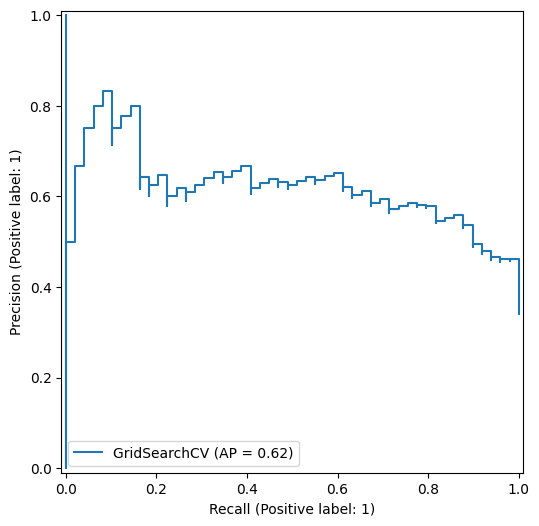

In [21]:
PrecisionRecallDisplay.from_estimator(svm_model_grid, X_test, y_test)
plt.show()

# Unbalanced data olduğu için P-RC seçtik. Balanced data olsaydı ROC seçecektik.

In [22]:
average_precision_score(y_test, decision_function)

np.float64(0.6188383317826918)

## Grafik

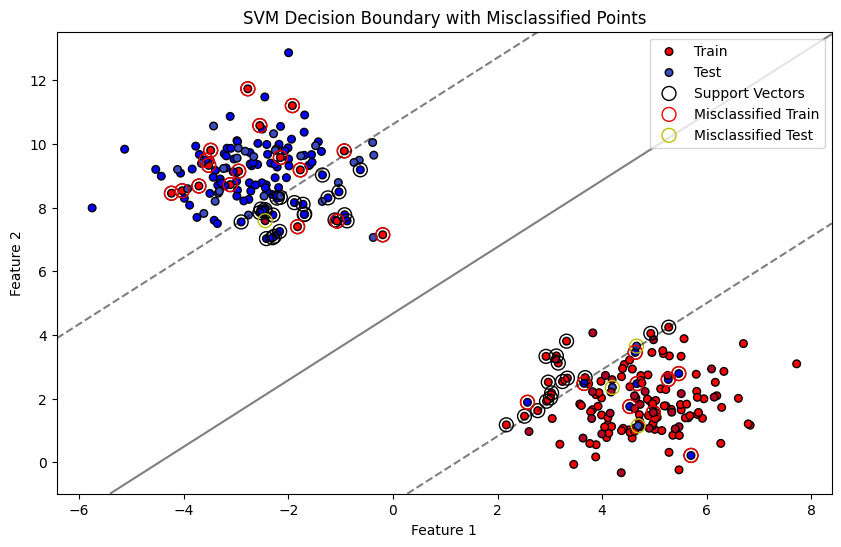

In [25]:
svm.plot_svm_decision_boundary_with_errors(X, y)